# Comparison of Linear Regression Models

This notebook compares two linear regression models to predict real estate prices:
1. A model that incorporates zip codes as a predictor variable.
2. A model that is specific to a single zip code.

We aim to understand how the inclusion of geographic segmentation (zip codes) as a variable affects the model performance compared to a model trained on data from a specific zip code.


In [84]:
import pandas as pd
import numpy as np
from model_training_funcs import get_model_with_zip, get_model_for_zip
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv')
df.head()


,#,Listing ID,St,MLS Area,Address,# Beds,# Full Baths,# Half Baths,# Garage Spaces,Levels,...,SqFt,List Price,LP$/SqFt,Close$/SqFt,Close Price,Close Date,DOM,CDOM,Zip Code,Type of Home
0,1,6996515,C,HU,21608 Wilmiller Ln,4,2,1,2.0,2,...,"2,581","$435,000",$168.54,$169.31,"$437,000",03/05/2024,4,4,78660,Single Family
1,1,1659174,C,PF,808 Whitehall Dr,3,2,0,2.0,1,...,"1,299","$275,000",$211.70,$184.76,"$240,000",12/29/2023,8,7,78660,Single Family
2,1,5349770,C,PF,16131 Stoneham Cir,3,2,0,1.0,1,...,"1,033","$265,000",$256.53,$242.01,"$250,000",11/14/2023,20,20,78660,Single Family
3,1,7256633,C,PF,17228 Sandwick Dr,3,2,0,2.0,1,...,"2,046","$235,000",$114.86,$123.66,"$253,000",01/30/2024,4,4,78660,Single Family
4,1,8113439,C,PF,15520 Sutton Leighs Ln,3,2,0,2.0,1,...,"1,616","$398,000",$246.29,$160.89,"$260,000",10/30/2023,48,48,78660,Single Family


In [85]:
# This is handled within the functions, so no need to load data here.
# Just an informational cell.
print("Data loading and cleaning functions are encapsulated within the model functions.")


Data loading and cleaning functions are encapsulated within the model functions.


In [86]:
# Model using zip codes as a predictor
model_with_zip, rmse_with_zip, r_squared_with_zip = get_model_with_zip()
print(f"Model with Zip Codes as Predictors: RMSE = {rmse_with_zip}, R-squared = {r_squared_with_zip}")


Model with Zip Codes as Predictors: RMSE = 377200.6817884638, R-squared = 0.5909159887906463


In [87]:
zips = df['Zip Code'].unique()

In [88]:
df['Zip Code'].value_counts()

Zip Code
78660    517
78642    455
78666    408
78620    232
78744    206
78664    166
78746     99
78701     61
78758     30
Name: count, dtype: int64

In [89]:
# Model for a specific zip code (e.g., 78660)
zrsdic = {}
rslist = []
for zip in zips:
    zip_code = zip
    print(zip)
    model_for_zip, rmse_for_zip, r_squared_for_zip = get_model_for_zip(zip_code)
    print(f"Model for Zip Code {zip_code}: RMSE = {rmse_for_zip}, R-squared = {r_squared_for_zip}")
    if r_squared_for_zip is not None:
        rslist.append(r_squared_for_zip)
        zrsdic[zip] = r_squared_for_zip , df[df['Zip Code'] == zip].shape[0]


78660
Model for Zip Code 78660: RMSE = 42708.71002938853, R-squared = 0.9005311593567898
78744
Model for Zip Code 78744: RMSE = 74245.29666153088, R-squared = 0.7100305832826173
78746
Model for Zip Code 78746: RMSE = 1161559.8027745523, R-squared = 0.030885039141173465
78701
No data available for ZIP code 78701 with Single Family homes.
Model for Zip Code 78701: RMSE = None, R-squared = None
78642
Model for Zip Code 78642: RMSE = 89341.87605587009, R-squared = 0.8644930704995539
78666
Model for Zip Code 78666: RMSE = 78197.04647215671, R-squared = 0.8404992480766511
78664
Model for Zip Code 78664: RMSE = 70680.82703230758, R-squared = 0.5135521001511654
78758
No data available for ZIP code 78758 with Single Family homes.
Model for Zip Code 78758: RMSE = None, R-squared = None
78620
Model for Zip Code 78620: RMSE = 341923.4142503515, R-squared = 0.660368982635865


In [90]:
zrsdic

{78660: (0.9005311593567898, 517),
 78744: (0.7100305832826173, 206),
 78746: (0.030885039141173465, 99),
 78642: (0.8644930704995539, 455),
 78666: (0.8404992480766511, 408),
 78664: (0.5135521001511654, 166),
 78620: (0.660368982635865, 232)}

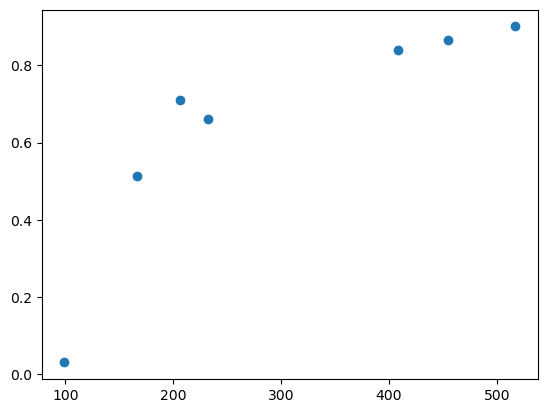

In [91]:
cs = []
rs = []
for zip in zrsdic.keys():
    cs.append(df[df['Zip Code'] == zip].shape[0])
    rs.append(zrsdic[zip][0])

plt.plot(cs, rs, 'o')


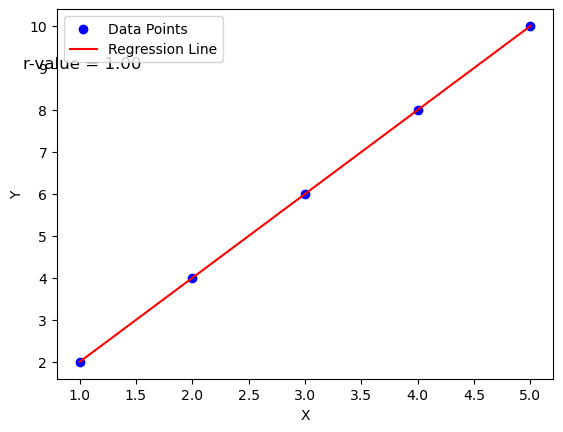

In [93]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# Assuming you have the x and y data for the regression
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create a scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Create a line plot of the regression line
plt.plot(x, intercept + slope * x, color='red', label='Regression Line')

# Add the r-value to the plot
plt.text(0.5, 9, f'r-value = {r_value:.2f}', fontsize=12)

# Add labels and a legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()



## Model Comparison Results

The comparison of the two models indicates the following:
- **Model with Zip Codes as Predictors**:
  - RMSE: `rmse_with_zip`
  - R-squared: `r_squared_with_zip`
- **Model for Specific Zip Code (78660)**:
  - RMSE: `rmse_for_zip`
  - R-squared: `r_squared_for_zip`

From these results, we can observe that (provide a brief analysis based on the RMSE and R-squared values).


## Conclusion

This analysis provides insight into how the scope of training data, either generalized or specific, influences the performance of predictive modeling in real estate. Depending on the results, we can conclude whether broader geographic factors or local specificity is more predictive of real estate prices in our models.
